<div class="output_png output_subarea output_execute_result">
<center>
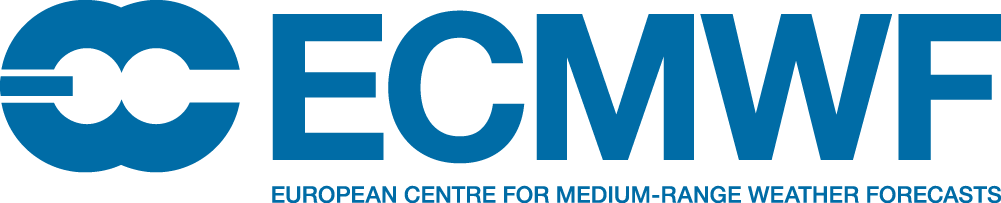</center>
</div>

# 	Ensemble mean for total precipitation

This notebook will provide you guidance how to explore and plot ECMWF open dataset to produce the map from the ECMWF open charts web product.  
The original product can be found on this link: https://apps.ecmwf.int/webapps/opencharts/products/medium-tp-mean


<div class="output_png output_subarea output_execute_result">
<center>
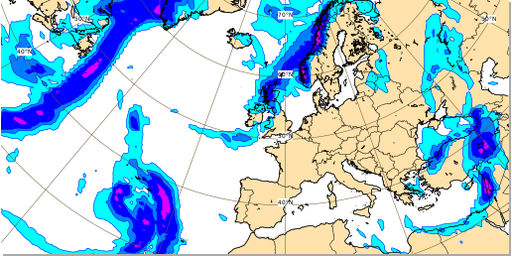</center>
</div>

The full list of available Open data products can be found [here](https://www.ecmwf.int/en/forecasts/datasets/open-data), and more information can be found in the [User documentation](https://confluence.ecmwf.int/display/UDOC/ECMWF+Open+Data+-+Real+Time).  

Access to ECMWF Open data is governed by the Creative Commons CC-BY-4.0 licence and associated [Terms of Use](https://apps.ecmwf.int/datasets/licences/general/).  

<sub> In applying this licence, ECMWF does not waive the privileges and immunities granted to it by virtue of its status as an intergovernmental organisation nor does it submit to any jurisdiction </sub>

To find out how to obtain the access to the full forecast dataset at higher resolution please visit our [Access page](https://www.ecmwf.int/en/forecasts/accessing-forecasts).

## Retrieve Data
This product takes in input 1 parameter :

* [Total precipitation](https://apps.ecmwf.int/codes/grib/param-db/?id=228228)  


In this example, we will use: 
- **ecmwf.opendata** Client to download the data
- **ecmwf.data** library to read and process the data (calculate the speed and probabilities)
- **ecmwf.geomaps** to plot the result

First we need to install them in the current Jupyter kernel:  
<div class="alert alert-block alert-info">
<b>Note:</b> If you are running the notebook on MyBinder or already have the libraries installed, go directly to importing the libraries.
</div>
<div class="alert alert-block alert-info">
<b>Note:</b> If you don't have these libraries installed, click on three dots below, uncomment the code and run the next cell.
</div>

In [1]:
#import sys
#!{sys.executable} -m pip install ecmwf-data ecmwf-opendata git+https://github.com/ecmwf/ecmwf-geomaps.git

In [2]:
import ecmwf.data as ecdata
from ecmwf.geomaps import GeoMap
from ecmwf.opendata import Client

In [3]:
client = Client("ecmwf", beta=True)

In [4]:
parameters = ['tp']
filename = 'medium-tp-mean.grib'
filename

'medium-tp-mean.grib'

In [5]:
client.retrieve(
    date=-2,
    time=0,
    step=[9,12],
    stream="enfo",
    type="ef",
    levtype="sfc",
    param=parameters,
    target=filename
)

{'date': '-2', 'time': '0', 'step': '9', 'stream': 'enfo', 'type': 'ef', 'resol': '0p4-beta', '_url': 'https://ai4edataeuwest.blob.core.windows.net/ecmwf', 'extension': 'grib2'}
{'date': '-2', 'time': '0', 'step': '12', 'stream': 'enfo', 'type': 'ef', 'resol': '0p4-beta', '_url': 'https://ai4edataeuwest.blob.core.windows.net/ecmwf', 'extension': 'grib2'}
{'levtype': ['sfc'], 'param': ['tp'], 'step': ['9', '12'], 'type': ['cf', 'pf']}


## Reading and processing the data
Now we can use **ecmwf.data** to read the file.

In [6]:
data = ecdata.read(filename)

The **describe()** function will give us the overview of the dataset.  

In [7]:
data.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
tp,surface,0,20220116,0,"9,12","0,1,...",228228,od,enfo,"cf,pf",0001


We can use **ls()** function to list all the fields in the file we downloaded.

In [8]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,tp,surface,0,20220116,0,9,pf,25,regular_ll
1,ecmf,tp,surface,0,20220116,0,9,pf,32,regular_ll
2,ecmf,tp,surface,0,20220116,0,9,pf,47,regular_ll
3,ecmf,tp,surface,0,20220116,0,9,pf,23,regular_ll
4,ecmf,tp,surface,0,20220116,0,9,pf,43,regular_ll
5,ecmf,tp,surface,0,20220116,0,9,pf,45,regular_ll
6,ecmf,tp,surface,0,20220116,0,9,pf,50,regular_ll
7,ecmf,tp,surface,0,20220116,0,9,pf,41,regular_ll
8,ecmf,tp,surface,0,20220116,0,9,pf,49,regular_ll


### Calculating total precipitation between two forecast steps
Toral precipitation data is provided as accumulated value from the start of the forecast. Therefore we need to 'deacumulate' it, to calculate the precipitation between two steps.  
In other words, we need to substract the value at step 9 from value at step 12, to get the value of precipitation between steps 9 and 12.

The following cell will select needed steps and do the substraction for all the ensemble members.

In [9]:
tp_09 = data.select(step= 9)
tp_12 = data.select(step= 12)
tp = tp_12 - tp_09

In the end we still need to calculate the mean total precipitation:

In [10]:
tp_mean = ecdata.mean(tp)

## Plotting the data
And finally, we can plot the data on the map. 

Magics-warning: description is not a known keyword


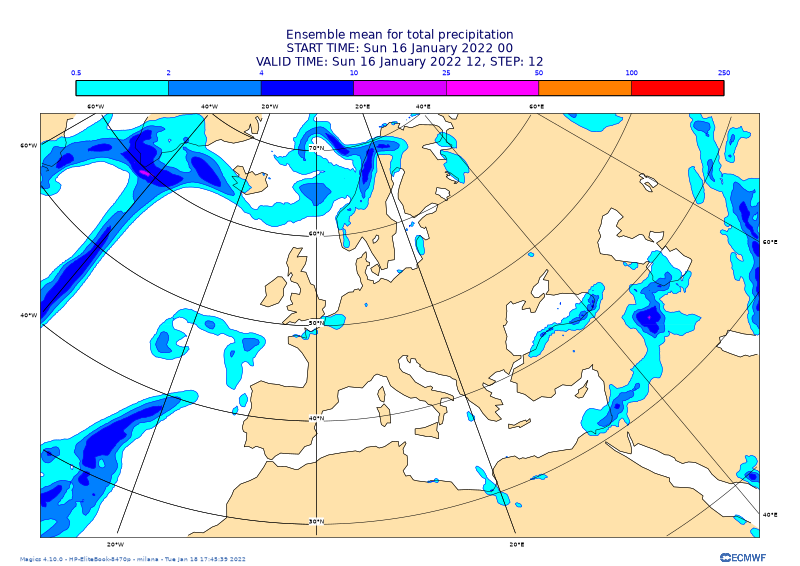

In [11]:
fig = GeoMap(area_name='europe', preset='background-foreground')

fig.contour_lines(tp_mean, preset="sh_blured_f05t300lst")

fig.title(["Ensemble mean for total precipitation", 
           "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' />",
           "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' />, STEP: <grib_info key='step' />"])
fig.legend()

fig.show()